In [1]:
import numpy as np
import pandas as pd
from utils.utils import PROJECT_DATA_DIR
import os
import mxnet as mx
import tarfile
import warnings
warnings.filterwarnings("ignore")

/Users/gusryd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/gusryd/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
#karm  = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_training_400_karm.csv'), sep='\s+', header=None)

In [3]:
#karm.head()

In [4]:
#print(karm.shape)
#print('labels:', karm[karm.columns[-1]].unique())

In [5]:
#data = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_training_200_4.csv'), sep='\s+', header=None)

In [6]:
#df = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_training_100.csv'),sep='\s+', header=None)

In [7]:
#df.head()

In [8]:
#print(df.shape)
#print('labels:', df[df.columns[-1]].unique())


In [9]:
#print(data[data.columns[-1]].unique())
#data.head()

In [10]:
#data.shape

In [11]:
#df1 = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'all_test_2000_1.csv'),sep='\s+', header=None)

In [12]:
#df1.head()

In [13]:
#df1.shape

In [14]:
#data_iter = mx.io.CSVIter(
#    data_csv=os.path.join(PROJECT_DATA_DIR, 'all_test_2000_1.csv'),data_shape=(1,), batch_size=2**9)

In [15]:
#data_iter

In [16]:
#for batch in data_iter:
#    print([batch.data, batch.pad])

In [17]:
# Work with neural networks

In [18]:
sensor_train = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                        'all_training_400_minisensor_1.csv'), 
                           sep='\s+', header=None)

sensor_test = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                       'all_test_400_minisensor.csv'),
                          sep='\s+', header=None)

In [19]:
sensor_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-3,3,4,-3,3,4,1,-3,2,0,...,0,0,0,3,0,-4,-2,0,-5,8
1,3,0,0,1,0,0,0,2,0,0,...,-1,0,-7,3,-1,-7,7,-1,-5,7
2,1,-3,7,0,1,4,-3,4,0,-2,...,-4,1,8,-2,1,12,0,4,11,4
3,4,1,-1,3,4,-8,3,4,-1,3,...,0,4,-5,-1,3,6,3,4,7,6
4,0,-4,0,5,0,0,5,0,-5,0,...,0,-4,-4,3,3,0,4,3,1,8


In [20]:
sensor_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,1,-1,-1,0,2,-1,-2,2,1,-2,...,-2,-3,0,0,0,1,0,2,0,8
1,3,6,-13,3,6,-8,3,6,-2,-1,...,-1,7,44,14,7,51,23,11,59,6
2,-1,2,-1,2,0,-1,-4,-3,0,-4,...,-1,0,-1,-1,0,-8,-3,0,-3,5
3,48,18,-57,48,-3,-148,37,-33,-241,29,...,4,0,-17,9,0,-17,6,0,-21,8
4,-2,-2,0,0,-3,1,-3,0,0,3,...,0,0,4,0,-3,6,3,-3,4,8


In [21]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 8,  7,  4,  6, -1,  1,  5,  2,  9,  3,  0])

In [22]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 8,  7,  4,  6, -1,  1,  5,  2,  9,  3,  0])

In [23]:
sensor_test[sensor_test.columns[-1]].unique()

array([ 8,  6,  5,  4,  0, -1,  2,  1,  9,  7,  3])

In [24]:
from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                   Imputer,
                                   QuantileTransformer)

In [25]:
ytrain = sensor_train[sensor_train.columns[-1]]
#ytrain.head()
xtrain = sensor_train.drop(sensor_train.columns[-1], axis=1) 

In [26]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-3,3,4,-3,3,4,1,-3,2,0,...,-1,0,0,0,3,0,-4,-2,0,-5
1,3,0,0,1,0,0,0,2,0,0,...,-8,-1,0,-7,3,-1,-7,7,-1,-5
2,1,-3,7,0,1,4,-3,4,0,-2,...,4,-4,1,8,-2,1,12,0,4,11
3,4,1,-1,3,4,-8,3,4,-1,3,...,-1,0,4,-5,-1,3,6,3,4,7
4,0,-4,0,5,0,0,5,0,-5,0,...,4,0,-4,-4,3,3,0,4,3,1


In [27]:
ytest = sensor_test[sensor_test.columns[-1]]
xtest = sensor_test.drop(sensor_test.columns[-1], axis=1) 

In [28]:
ytrain_sc = ytrain.map(lambda x: 1 if (x == 2 or x == 3) else 0)
ytest_sc = ytest.map(lambda x: 1 if (x == 2 or x == 3) else 0)

In [29]:
print(ytrain_sc.unique())
ytrain_sc.head()


[0 1]


0    0
1    0
2    0
3    0
4    0
Name: 1200, dtype: int64

## New data

In [30]:
#list_ = []
#train_list = ['xab.csv', 'xaa.csv']
#for x in train_list:
#    df = pd.read_csv(os.path.join(PROJECT_DATA_DIR, x), sep='\s+', header=None)
#    list_.append(df)
#train_xab = pd.concat(list_)

#train_xab= pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'xab.csv'), sep='\s+', header=None)

In [31]:
#train_xab.head()

In [32]:
#train_xab.shape

In [33]:
#ytrain_xab = train_xab[train_xab.columns[-1]]
#print(ytrain_xab.unique())

In [34]:
#xtrain_xab = train_xab.drop(train_xab.columns[-1], axis=1)

In [35]:
#xtrain_xab.head()

In [36]:
#test_xab = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'xab_test_400.csv'), sep='\s+', header=None)

In [37]:
#test_xab.head()

In [38]:
#test_xab.shape

In [39]:
#xtest_xab.head()

In [40]:
#ytest_xab = test_xab[test_xab.columns[-1]]
#print(ytest_xab.unique())
#xtest_xab = test_xab.drop(test_xab.columns[-1])

In [41]:
#xtest_xab = test_xab.drop(test_xab.columns[-1], axis=1)

In [42]:
#xtest_xab.shape

In [43]:
#xtest_xab.head()

In [44]:
#ytrain_xab = ytrain_xab.map(lambda x: 1 if x in [12, 13, 17, 20] else 0)
#ytest_xab = ytest_xab.map(lambda x: 1 if x in [12, 13, 17, 20] else 0)

In [45]:
#print(ytrain_xab.unique())
#ytrain_xab.head()

## Preprocessing

In [46]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91104 entries, 0 to 91103
Columns: 1200 entries, 0 to 1199
dtypes: int64(1200)
memory usage: 834.1 MB


In [47]:
print(xtrain.shape)
xtrain.describe()

(91104, 1200)


,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
count,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,...,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000
mean,-0.148303,-0.084958,1.254369,-0.187906,-0.006333,1.236104,-0.169652,-0.041293,1.176655,-0.134264,...,1.176524,-0.145855,-0.018858,1.112937,-0.092213,-0.039427,1.077790,-0.040437,-0.056682,1.104759
std,27.286271,27.909568,46.855641,27.765273,28.559648,46.999119,28.626503,28.982204,46.765926,28.193874,...,46.367091,27.301695,27.251507,46.007632,27.150623,27.219451,46.120196,26.833842,26.793117,45.991891
min,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-1160.000000,-2305.000000,...,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-950.000000
25%,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,...,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,...,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000
max,542.000000,2001.000000,1169.000000,438.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,...,1169.000000,542.000000,2001.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000


In [48]:
import matplotlib.pyplot as plt

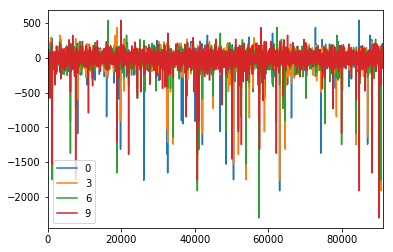

In [49]:
xtrain[xtrain.columns[0:10:3]].plot()
plt.show()

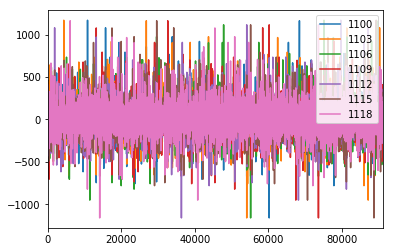

In [50]:
xtrain[xtrain.columns[1100:1120:3]].plot()
plt.show()

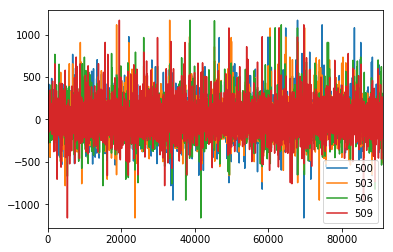

In [51]:
xtrain[xtrain.columns[500:510:3]].plot()
plt.show()

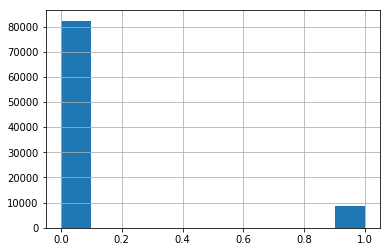

In [52]:
ytrain_sc.hist()
plt.show()

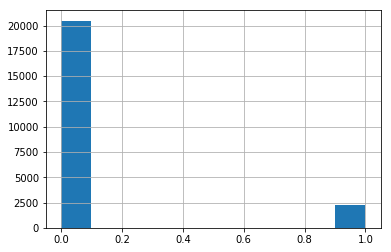

In [53]:
ytest_sc.hist()
plt.show()

## Scaling and transforming data

In [54]:
scaler = StandardScaler()#QuantileTransformer(output_distribution='normal')
xtrain_sc = scaler.fit_transform(xtrain)
xtest_sc = scaler.transform(xtest)

In [55]:
print(ytrain_sc.shape)
print(xtrain_sc.shape)
type(xtrain_sc)


(91104,)
(91104, 1200)


numpy.ndarray

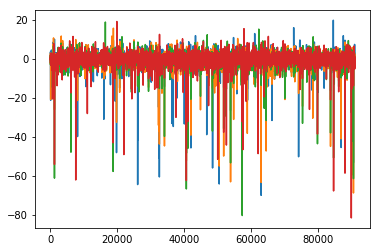

In [56]:
plt.plot(xtrain_sc[:,0:10:3])
plt.show()


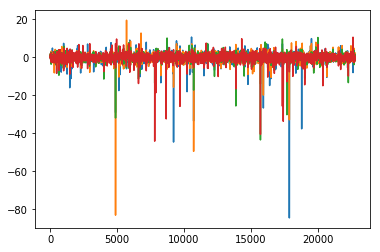

In [57]:
plt.plot(xtest_sc[:,0:10:3])
plt.show()

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras import optimizers
from sklearn.metrics import f1_score

Using TensorFlow backend.


In [59]:
def model(drop_rate, lr, units, decay, no_features, no_outputs):
    optim = optimizers.Adam(lr=lr,
                            beta_1=0.9,
                            beta_2=0.999,
                            decay=1e-6)
    model = Sequential()
    model.add(BatchNormalization(input_shape=(xtrain.shape[1], )))
    model.add(Dense(units, activation='relu', input_dim=1200))
    model.add(Dense(1, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optim=optim, 
                  metrics=['accuracy'])
    
    return model

In [60]:
#del model
model = Sequential()
#model.add(BatchNormalization(input_dim=1200))
model.add(Dense(units=1200, activation='relu', input_dim=1200), )
model.add(Dropout(0.4))
model.add(Dense(units=500))
model.add(Dropout(0.4))
model.add(Dense(units=75, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
lr = 0.001
optim = optimizers.Adam(lr=lr,
                        beta_1=0.9,
                        beta_2=0.999,
                        decay=1e-6)
model.compile(loss='binary_crossentropy',
                        optimizer=optim,
                        metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain_sc,
                    ytrain_sc,
                    epochs=20,
                    batch_size=2**9, 
                    validation_data=(xtest_sc, ytest_sc))

Train on 91104 samples, validate on 22776 samples
Epoch 1/20
91104/91104 [==============================] - 18s 193us/step - loss: 0.2086 - acc: 0.9408 - val_loss: 0.0704 - val_acc: 0.9663
Epoch 2/20
91104/91104 [==============================] - 17s 183us/step - loss: 0.0662 - acc: 0.9726 - val_loss: 0.0483 - val_acc: 0.9773
Epoch 3/20
91104/91104 [==============================] - 17s 182us/step - loss: 0.0458 - acc: 0.9813 - val_loss: 0.0361 - val_acc: 0.9843
Epoch 4/20
91104/91104 [==============================] - 17s 181us/step - loss: 0.0323 - acc: 0.9872 - val_loss: 0.0349 - val_acc: 0.9864
Epoch 5/20
91104/91104 [==============================] - 17s 186us/step - loss: 0.0287 - acc: 0.9896 - val_loss: 0.0274 - val_acc: 0.9902
Epoch 6/20
91104/91104 [==============================] - 16s 181us/step - loss: 0.0230 - acc: 0.9919 - val_loss: 0.0212 - val_acc: 0.9928
Epoch 7/20
91104/91104 [==============================] - 16s 180us/step - loss: 0.0191 - acc: 0.9935 - val_loss: 0.

In [ ]:
pred_train = model.predict_classes(xtrain_sc)
pred_test = model.predict_classes(xtest_sc)
print(pred_test)
print('')
print('unique values train data set', np.unique(pred_train))
print('unique values test data set:', np.unique(pred_test))
print('')
print('training score:', f1_score(ytrain_sc, pred_train))
print('test score:', f1_score(ytest_sc, pred_test))

In [ ]:
scaler_xab = QuantileTransformer(copy=False, 
                                 output_distribution='normal', 
                                 n_quantiles =100)
xtrain_xab_sc = scaler_xab.fit_transform(xtrain_xab)
xtest_xab_sc = scaler_xab.transform(xtest_xab)

In [ ]:
print(xtrain_xab_sc.shape)
print(xtest_xab_sc.shape)

In [ ]:
history = model.fit(xtrain_xab_sc,
                    ytrain_xab,
                    epochs=20,
                    batch_size=2**9, 
                    validation_data=(xtest_xab_sc, ytest_xab))

In [ ]:
pred_train_xab = model.predict_classes(xtrain_xab_sc)
pred_test_xab = model.predict_classes(xtest_xab_sc)
print('train score xab data set:', f1_score(ytrain_xab, pred_train_xab))
print('test score xabe data set:', f1_score(ytest_xab, pred_test_xab))


In [ ]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.legeng()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cfn_matrix = confusion_matrix(ytrain_xab, pred_train_xab)


In [ ]:
#drop_rate = 0.4
#lr = 0.001
#decay = 1e-6
#units = 500
#no_features = xtrain.shape[1]
#no_outputs = 1
#model = model(drop_rate, lr, decay, units, no_features, no_outputs)

In [ ]:
xtrain_sensor = scaler_xab.transform(xtrain)
xtest_sensor = scaler_xab.transform(xtest)

In [ ]:
pred_sensor_train = model.predict_classes(xtrain_sensor)
pred_sensor_test = model.predict_classes(xtest_sensor)
print('')
print('train sensor:', f1_score(ytrain_sc, pred_sensor_train))
print('test sensor:', f1_score(ytest_sc, pred_sensor_test))